# Largest Contentful Paint

## Imports

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Database Query

In [2]:
query = """
SELECT 
    page,
    rendering_type,
    json_extract(report, '$.largestContentfulPaint') AS lcp
FROM metrics
WHERE report IS NOT NULL
    AND json_extract(report, '$.largestContentfulPaint') IS NOT NULL
    AND iteration_group = ?
"""

## Helper Functions - Plots

In [3]:
def plot_boxplot(iteration_group: int):
    conn = sqlite3.connect("../../metrics.db")
    df = pd.read_sql_query(query, conn, params=(iteration_group,))
    conn.close()

    if df.empty:
        print(f"No data found for iteration group {iteration_group}")
        return

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="page", y="lcp", hue="rendering_type", data=df, legend=False)
    plt.title(f"Largest Contentful Paint - {iteration_group} Iterationen")
    plt.xlabel("Page")
    plt.ylabel("Zeit in s")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def plot_table(iteration_group: int):
    conn = sqlite3.connect("../../metrics.db")
    df = pd.read_sql_query(query, conn, params=(iteration_group,))
    conn.close()
    
    summary = df.groupby("rendering_type")["lcp"].agg(["mean", "std", "min", "max"]).round(2)
    display(summary)

## Visualization

### 10 Iterations

,mean,std,min,max
rendering_type,,,,
CSR,3040.65,9.68,3029.59,3052.62
SSR,1260.95,13.43,1250.21,1284.16


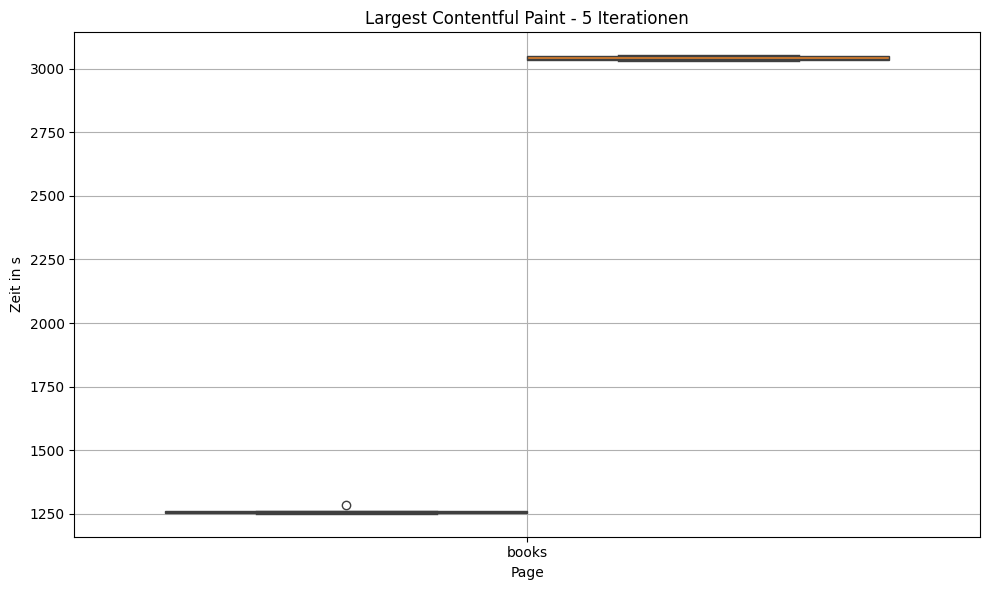

In [6]:
plot_table(5)
plot_boxplot(5)

### 100 Iterations

,mean,std,min,max
rendering_type,,,,
CSR,8429.09,188.21,8250.07,8700.55
SSR,8603.10,71.16,8551.40,8705.70


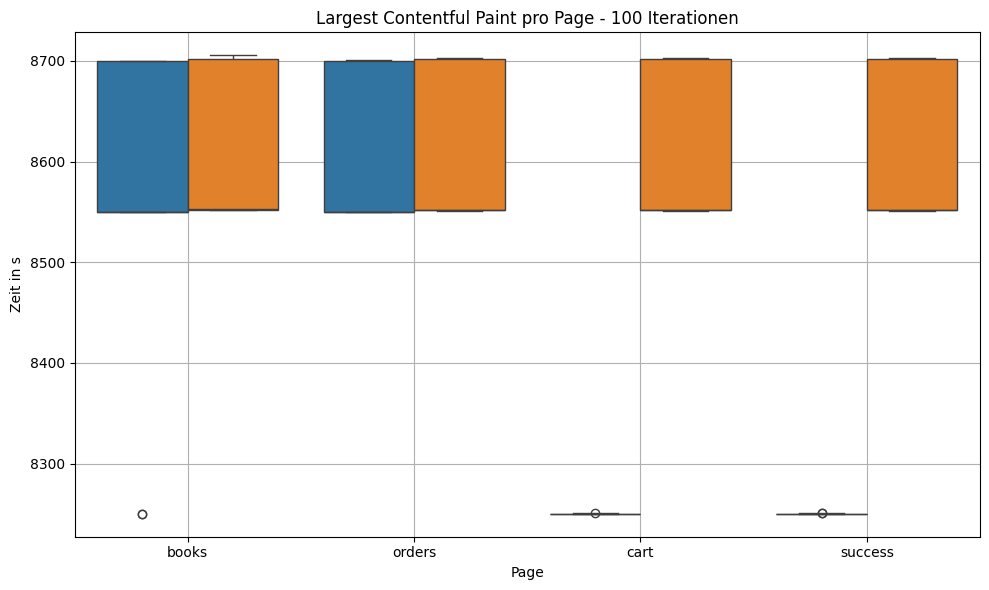

In [7]:
plot_table(100)
plot_boxplot(100)

### 1.000 Iterations

,mean,std,min,max
rendering_type,,,,
CSR,8393.48,472.45,2550.06,8700.51
SSR,8596.94,211.76,1202.10,8705.35


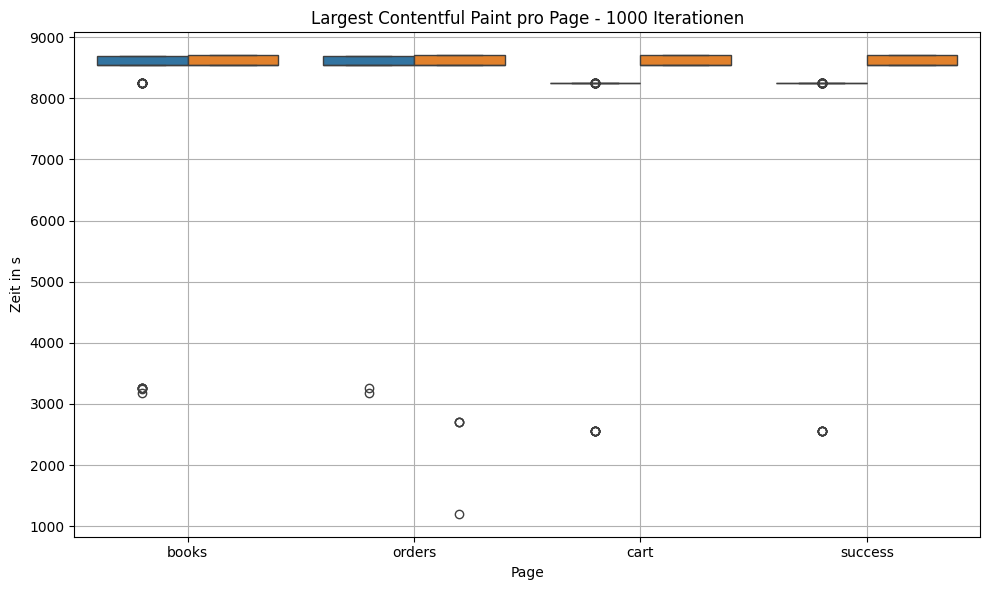

In [8]:
plot_table(1000)
plot_boxplot(1000)